In [21]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
# Load the data
data = pd.read_csv(r'C:\Users\Rishik Baishya\Desktop\HDC\heart.csv')

# Data Pre-Processing

In [23]:
# Data Pre-processing
data = data.dropna(axis=0)# Dropping NaN values
data = data.apply(pd.to_numeric)# Transform data to numeric to enable further analysis
X = np.array(data.drop('target',axis=1))
y = np.array(data['target'])
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

# Binary Classification Model

In [24]:
# Create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

# Define a new keras model for binary classification
def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()


In [25]:
# Training the model
history = binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 0.6709 - accuracy: 0.6756 - val_loss: 0.5889 - val_accuracy: 0.8244
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8378 - val_loss: 0.3723 - val_accuracy: 0.8390
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8585 - val_loss: 0.3563 - val_accuracy: 0.8293
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8829 - val_loss: 0.3410 - val_accuracy: 0.8537
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8610 - val_loss: 0.3239 - val_accuracy: 0.8829
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8768 - val_loss: 0.3268 - val_accuracy: 0.8780
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8817 - val_loss: 0.3177 - val_accuracy: 0.8927
Epoch 8/50
82/82 [==

In [26]:
# Predict the labels for the test data
y_pred = binary_model.predict(X_test)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Now compute the accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)

# Convert to percentage and round to two decimal places
test_accuracy_percent = round(test_accuracy * 100, 2)

print(f'Test Accuracy: {test_accuracy_percent}%')

# Print classification report
print(classification_report(y_test, y_pred_binary))

7/7 [==============================] - 0s 929us/step
Test Accuracy: 94.63%
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.93      0.97      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



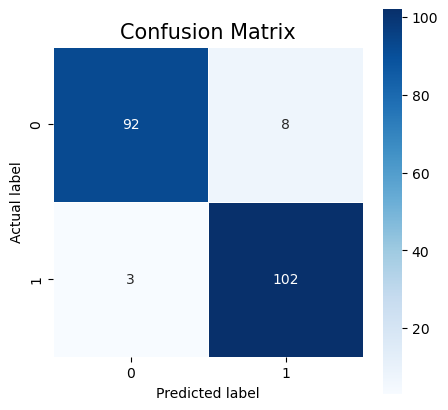

In [27]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()


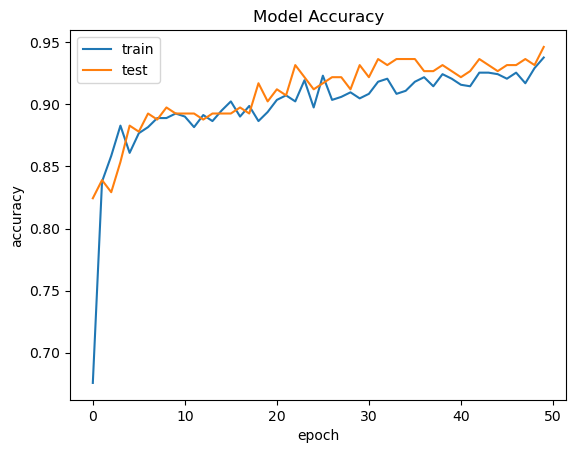

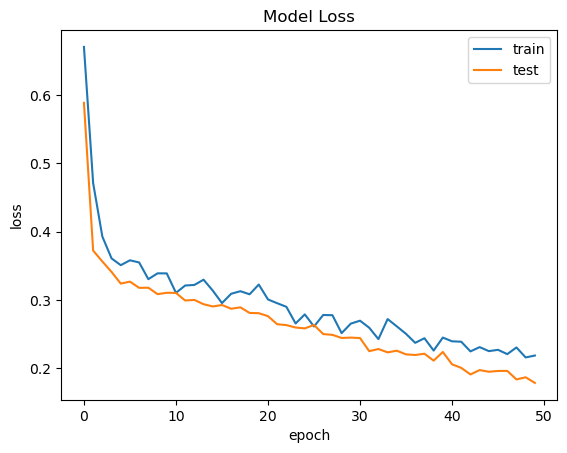

In [28]:
# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


7/7 [==============================] - 0s 2ms/step


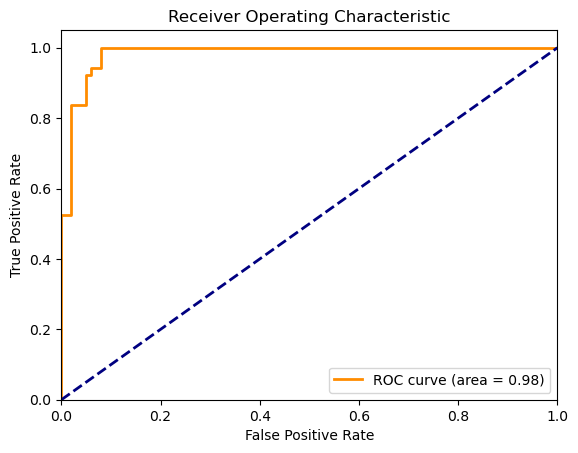

In [29]:
# ROC CURVE
y_pred = binary_model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



# K-Nearest Neighbours Classifier 

Test Accuracy (KNN): 94.63%
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



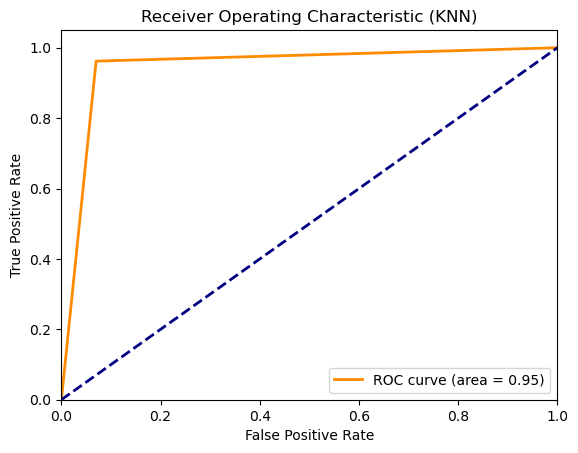

In [30]:
# Creating a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predicting the labels for the test data
y_pred_knn = knn.predict(X_test)

# Now computing the accuracy
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Converting to percentage and round to two decimal places
test_accuracy_percent_knn = round(test_accuracy_knn * 100, 2)

print(f'Test Accuracy (KNN): {test_accuracy_percent_knn}%')

# Calculating Precision, Recall, F1 Score
print(classification_report(y_test, y_pred_knn))

# Computing ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes Classifier

Test Accuracy (Naive Bayes): 82.93%
Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



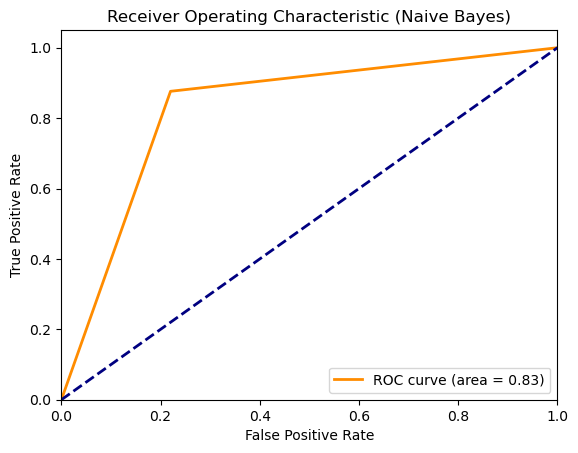

In [31]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier with the training data
gnb.fit(X_train, y_train)

# Predict the response on the test dataset
y_pred_nb = gnb.predict(X_test)

# Now compute the accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Convert to percentage and round to two decimal places
test_accuracy_percent_nb = round(test_accuracy_nb * 100, 2)

print(f'Test Accuracy (Naive Bayes): {test_accuracy_percent_nb}%')

# Print classification report
print("Naive Bayes Classification Report: \n", classification_report(y_test, y_pred_nb))

y_pred_nb = gnb.predict(X_test)

# Compute ROC curve and ROC area for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine Classifier

Test Accuracy (SVM): 81.46%
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



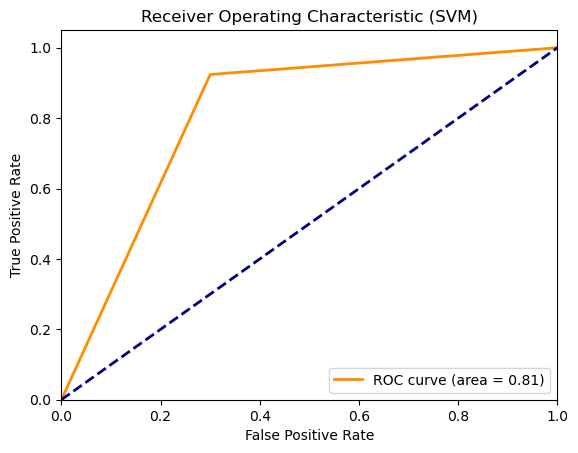

In [32]:
# Creating a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Trainning the model using the training sets
clf.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred_svm = clf.predict(X_test)

# Now computing the accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Converting to percentage and round to two decimal places
test_accuracy_percent_svm = round(test_accuracy_svm * 100, 2)

print(f'Test Accuracy (SVM): {test_accuracy_percent_svm}%')

# Calculating Precision, Recall, F1 Score
print(classification_report(y_test, y_pred_svm))

# Computing ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot
plt.figure()
lw = 2
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression Classifier

Test Accuracy (Logistic Regression): 80.98%
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



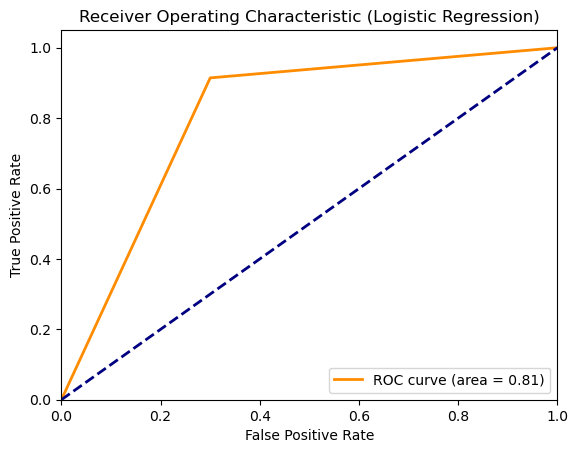

In [33]:
# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Train the classifier with the training data
logreg.fit(X_train, y_train)

# Predict the response on the test dataset
y_pred_lr = logreg.predict(X_test)

# Now compute the accuracy
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Convert to percentage and round to two decimal places
test_accuracy_percent_lr = round(test_accuracy_lr * 100, 2)

print(f'Test Accuracy (Logistic Regression): {test_accuracy_percent_lr}%')

# Print classification report
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_lr))

y_pred_lr = logreg.predict(X_test)

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Creating The Pickle File

In [34]:
# Saving model to disk
pickle.dump(knn, open('model.pkl','wb'))

In [35]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7]]))

[1]


# Implementation of The Best Performing Model

In [ ]:
# Ask the user for their information
age = float(input("How old are you? "))
sex = float(input("What is your gender? Enter 1 for male and 0 for female. "))
cp = float(input("What type of chest pain do you experience? Enter 1 for typical angina, 2 for atypical angina, 3 for non-anginal pain, or 4 if you don't experience any chest pain. "))
trestbps = float(input("What is your resting blood pressure in mm Hg? "))
chol = float(input("What is your cholesterol level in mg/dl? "))
fbs = float(input("Is your fasting blood sugar greater than 120 mg/dl? Enter 1 for yes and 0 for no. "))
restecg = float(input("What were your resting electrocardiographic results? Enter 0 for normal, 1 for having ST-T wave abnormality, or 2 for showing probable or definite left ventricular hypertrophy. "))
thalach = float(input("What is your maximum heart rate achieved? "))
exang = float(input("Do you experience angina (chest pain) when you exercise? Enter 1 for yes and 0 for no. "))
oldpeak = float(input("What is your ST depression induced by exercise relative to rest? "))
slope = float(input("What is the slope of the peak exercise ST segment? Enter 1 for upsloping, 2 for flat, or 3 for downsloping. "))
ca = float(input("How many of your major vessels are colored by fluoroscopy (0-3)? "))
thal = float(input("Do you have thalassemia, a blood disorder? Enter 3 for normal, 6 for fixed defect, or 7 for reversible defect. "))

# Creating a 2D array from the user's input
X_new = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# Using the model to make a prediction
y_new = binary_model.predict(X_new)

# Converting the predicted probability to a binary label
y_new_binary = (y_new > 0.5).astype(int)

# Printing the prediction
if y_new_binary[0] == 0:
    print("You do not have heart disease.")
else:
    print("You have heart disease.")